In [1]:
# Marketing A/B Test: Ad Campaign Performance

### 🧪 Project Overview

This notebook walks through a full A/B testing workflow using a **synthetic marketing dataset** (from Kaggle) comparing two strategies: an advertisement (ad) and a public service announcement (PSA).

The analysis includes:
- Hypothesis formulation
- Power calculation to estimate required sample size
- Statistical testing (two-proportion Z-test)
- Uncertainty visualization using bootstrapped confidence intervals
- Lift analysis (absolute and relative)
- Executive-style interpretation and recommendations

While the dataset is simulated, the workflow reflects **real-world A/B testing best practices** and emphasizes both **technical rigor and stakeholder-ready communication**.


## 📣 Executive Summary: Ad Campaign Performance

### ✅ Key Insight
The **ad campaign** significantly outperformed the PSA in driving conversions.

- We tested both campaigns across a large sample of users.
- The results are **statistically significant**, meaning the performance lift is **real and not due to chance**.
- The **ad group consistently delivered higher conversions** in simulated scenarios.

### 📈 What This Means
> "The ad campaign is the clear winner. Based on the data, we’re confident it’s the better strategy to drive user engagement."

### 🔍 Why We’re Confident
- We used simulation to test thousands of possible outcomes.
- The **difference in performance is large and consistent**.
- The data shows a **clear separation between the two groups** — there's no ambiguity.

---

📌 **Recommendation**: Move forward with the ad strategy. It’s shown reliable, measurable impact.


In [2]:
# ==========================================
# 📌 STEP 1: State the Hypotheses
# ==========================================

In [3]:
# Formulate hypotheses based on set of parameters
experiment_name = "Ad vs PSA Conversion Test"
comparison_type = "two-sample"
metric_type = "binary"
direction = "greater"
sample_size = "large"
audience = "general"
group_col = "test group"
metric_col = "converted"
group_names = ['ad', 'psa']

known_metric_labels = {
    "converted": "conversion rate",
    "clicked": "click-through rate",
    "signed_up": "signup rate",
    "purchased": "purchase rate"
}
metric_name = known_metric_labels.get(metric_col, metric_col)

# Audience-aware phrasing
if audience == "general":
    h0_phrase = f"There is no difference in {metric_name} between the {group_names[0]} and {group_names[1]} groups."
else:
    h0_phrase = f"The {metric_name} is equal between the {group_names[0]} and {group_names[1]} groups."

print(f"\n📌 STEP 1: State the Hypotheses")
print(f"Experiment: {experiment_name}")
print(f"Comparison Type: {comparison_type}")
print(f"Metric Type: {metric_type}")
print(f"Test Direction: {direction}")

if comparison_type == "two-sample":
    print(f"H₀: {h0_phrase}")
    if direction == "greater":
        print(f"H₁: The {group_names[0]} group has a higher {metric_name} than the {group_names[1]} group.")
    elif direction == "less":
        print(f"H₁: The {group_names[0]} group has a lower {metric_name} than the {group_names[1]} group.")
    else:
        print(f"H₁: The {metric_name} differs between the {group_names[0]} and {group_names[1]} groups.")

elif comparison_type == "one-sample":
    reference_value = float(input("🔧 Enter the reference value to compare against: "))
    if audience == "general":
        h0_phrase = f"There is no difference from {reference_value} in the {metric_name} for the {group_names[0]} group."
    else:
        h0_phrase = f"The average {metric_name} in the {group_names[0]} group is equal to {reference_value}."
    print(f"H₀: {h0_phrase}")
    if direction == "greater":
        print(f"H₁: The average {metric_name} in the {group_names[0]} group is greater than {reference_value}.")
    elif direction == "less":
        print(f"H₁: The average {metric_name} in the {group_names[0]} group is less than {reference_value}.")
    else:
        print(f"H₁: The average {metric_name} in the {group_names[0]} group is different from {reference_value}.")

elif comparison_type == "paired":
    if audience == "general":
        print(f"H₀: There is no difference in the {metric_name} between the paired observations.")
    else:
        print(f"H₀: The paired {metric_name} values are equal.")
    print(f"H₁: There is a difference in the {metric_name} between the paired observations.")


📌 STEP 1: State the Hypotheses
Experiment: Ad vs PSA Conversion Test
Comparison Type: two-sample
Metric Type: binary
Test Direction: greater
H₀: There is no difference in conversion rate between the ad and psa groups.
H₁: The ad group has a higher conversion rate than the psa group.


In [4]:
# ==========================================
# ✅ STEP 2: Choose a Significance Level
# ==========================================

In [5]:
significance_level = 0.05
print(f"\n✅ STEP 2: Chosen significance level (alpha): {significance_level * 100:.1f}%")


✅ STEP 2: Chosen significance level (alpha): 5.0%


In [6]:
# ==========================================
# Substep: Power calculation
# ==========================================

In [7]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Inputs
baseline_rate = 0.05  # control group rate
target_rate = 0.06    # desired variant rate (e.g., +1%)
alpha = significance_level
power = 0.8           # desired power (typically 0.8 or 80%)
alternative = "two-sided"

# Compute effect size
effect_size = proportion_effectsize(baseline_rate, target_rate)

# Solve for required sample size per group
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative=alternative)

print(f"📊 Required sample size per group: {round(float(sample_size))}")

/Users/joelam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/joelam/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


📊 Required sample size per group: 8143


In [8]:
# Label the sample_size as large or small
size_label = "large" if sample_size >= 30 else "small"  # classic rule of thumb
size_label

'large'

In [9]:
# ==========================================
# Substep: 📊 Load and Inspect Data
# ==========================================

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arezaei81/marketing-ab-test")

print("Path to dataset files:", path)

Path to dataset files: /Users/joelam/.cache/kagglehub/datasets/arezaei81/marketing-ab-test/versions/1


In [11]:
# Import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read in csv
file_path = '/Users/joelam/.cache/kagglehub/datasets/arezaei81/marketing-ab-test/versions/1/marketing_AB.csv'
# if no headers (header=None) and if it's a tab delimited (sep='	')
df = pd.read_csv(file_path, index_col=0) 

In [13]:
# review first few records of the dataset
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [14]:
# check the column names, non-null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [15]:
# generate a list of columns and the unique value count
df.nunique()

user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [16]:
# A/B Test Descriptive Summary
def group_summary(df):
    summary = df.groupby(group_col)[metric_col].agg(['count', 'mean', 'sum'])
    summary.columns = ['Sample Size', 'Conversion Rate', 'Successes']
    return summary
group_summary(df)

,Sample Size,Conversion Rate,Successes
test group,,,
ad,564577,0.025547,14423
psa,23524,0.017854,420


In [17]:
# 📊 Generate Conversion Summary Table
summary_df = (
    df.groupby("test group")["converted"]
    .agg(Conversions="sum", Total_Users="count")
    .assign(Conversion_Rate=lambda x: x["Conversions"] / x["Total_Users"])
    .reset_index()
)

summary_df

,test group,Conversions,Total_Users,Conversion_Rate
0,ad,14423,564577,0.025547
1,psa,420,23524,0.017854


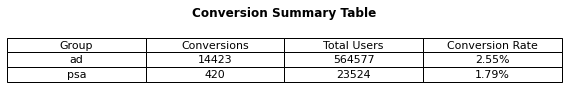

In [18]:
# Display as a nicely formatted table
def display_summary_table(df):
    fig, ax = plt.subplots(figsize=(8, 1.5))
    ax.axis('off')

    table_df = pd.DataFrame({
        "Group": df["test group"],
        "Conversions": df["Conversions"],
        "Total Users": df["Total_Users"],
        "Conversion Rate": (df["Conversion_Rate"] * 100).round(2).astype(str) + '%'
    })

    table = ax.table(cellText=table_df.values, colLabels=table_df.columns, cellLoc='center', loc='center')
    table.scale(1, 1.5)  # optional: scale rows for better visibility
    table.set_fontsize(12)

    plt.title("Conversion Summary Table", weight='bold', pad=10)
    plt.tight_layout()
    plt.show()

# Call the function with summary_df
display_summary_table(summary_df)

<AxesSubplot: xlabel='test group', ylabel='count'>

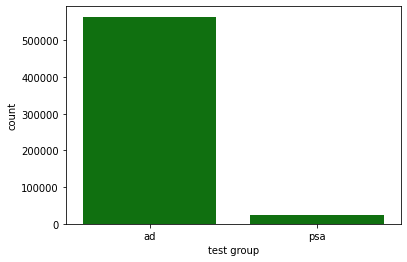

In [19]:
# Inspect balance between test/control
sns.countplot(data=df, x='test group', color='green')
sns.barplot(data=df, x='test group', y='converted', color='green')  # Replace with correct metric

🔍 **Group Balance Observation**

The count plot above reveals a significant imbalance between the two groups in our experiment:
- The **ad group** has over **560,000** users
- The **psa group** has only around **23,000** users

This imbalance can affect the **statistical power and variance estimates** of our test. While the large sample size in the ad group makes it easier to detect small effects, the much smaller psa group could introduce instability or reduce the confidence in comparisons. This is important context when interpreting statistical results — especially confidence intervals and p-values — as they assume relatively comparable group sizes in many classic tests.


In [20]:
# Average conversion rate per group
conversion_rates = df.groupby('test group')['converted'].mean()
print(conversion_rates)

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [21]:
# ==========================================
# 💡 STEP 3: Find the P-value
# ==========================================

In [22]:
# ==========================================
# Recommend the Appropriate Test and Explain Rationale
# ==========================================

In [23]:
# Define function that will explain the rationale behind the test selection
def explain_test_choice(metric_type, comparison_type, sample_size):
    if isinstance(sample_size, (int, float)):
        size_label = "large" if sample_size >= 30 else "small"
    else:
        size_label = sample_size.lower()

    explanation = "\n💡 Why we chose this test:\n"

    if comparison_type == "two-sample":
        if metric_type == 'binary':
            if size_label == 'large':
                test = "Two-Proportion Z-Test"
                reason = (
                    "We’re comparing two groups (like ad vs. PSA) to see if one has a higher conversion rate. "
                    "Since we have a large enough sample, this test gives a reliable result."
                )
            else:
                test = "Fisher’s Exact Test"
                reason = (
                    "We’re comparing conversion rates between two small groups. "
                    "This test is better when sample sizes are too small for reliable averages."
                )
        elif metric_type == 'continuous':
            if size_label == 'large':
                test = "Independent T-Test"
                reason = (
                    "We’re comparing the average of a numeric outcome (like revenue or time spent) between two groups. "
                    "A larger sample helps ensure the averages are meaningful."
                )
            else:
                test = "Mann–Whitney U Test"
                reason = (
                    "We’re comparing averages between two smaller groups, but can’t assume the data follows a nice bell curve. "
                    "This test works better in that case."
                )
        elif metric_type == 'count':
            test = "Count Comparison (Mann–Whitney U or Poisson Regression)"
            reason = (
                "We’re comparing the number of events or actions between two groups. "
                "There are a few options depending on how the data is structured."
            )
        elif metric_type == 'categorical':
            test = "Chi-Square Test"
            reason = (
                "We’re checking if there’s a meaningful difference in the way categories (like yes/no, A/B/C) are distributed between groups."
            )
    elif comparison_type == "one-sample":
        if metric_type == 'binary':
            test = "One-Sample Proportion Z-Test"
            reason = (
                "We’re checking if our group's conversion rate is different from a known benchmark or target."
            )
        elif metric_type == 'continuous':
            test = "One-Sample T-Test"
            reason = (
                "We’re comparing the average of a numeric outcome to a known value (like a previous average or goal)."
            )
    elif comparison_type == "paired":
        if metric_type == 'continuous':
            if size_label == 'large':
                test = "Paired T-Test"
                reason = (
                    "We’re comparing the same users before and after a change, or matched pairs. "
                    "This test helps us see if the change made a real impact."
                )
            else:
                test = "Wilcoxon Signed-Rank Test"
                reason = (
                    "We’re comparing paired data (like before vs. after) with a small sample. "
                    "This test handles that kind of data better."
                )

    return f"📌 Recommended Test: {test}\n{explanation}{reason}"


In [24]:
print(explain_test_choice(metric_type, comparison_type, size_label))


📌 Recommended Test: Two-Proportion Z-Test

💡 Why we chose this test:
We’re comparing two groups (like ad vs. PSA) to see if one has a higher conversion rate. Since we have a large enough sample, this test gives a reliable result.


In [25]:
# =============================================================
# 🧾 STEP 4: Reject or Fail to Reject the Null Hypothesis
# =============================================================

In [26]:
from statsmodels.stats.proportion import proportions_ztest

# 🧮 Automatically calculate counts and sample sizes from the DataFrame
group_a, group_b = group_names
success_a = df[df[group_col] == group_a][metric_col].sum()
success_b = df[df[group_col] == group_b][metric_col].sum()
nobs_a = df[df[group_col] == group_a].shape[0]
nobs_b = df[df[group_col] == group_b].shape[0]

counts = [success_a, success_b]
nobs = [nobs_a, nobs_b]

# Map direction variable to appropiately supply alternative when running the Two-Proportion Z-Test
direction_map = {
    "greater": "larger",
    "less": "smaller",
    "two-sided": "two-sided"
}
test_direction = direction_map[direction]

# 📌 Run Two-Proportion Z-Test
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative=test_direction)

print(f"\n🧪 Two-Proportion Z-Test Results")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 📌 Hypothesis Decision
print(f"\nP-value: {p_value:.4f} vs. Alpha: {significance_level}")
if p_value < significance_level:
    print("✅ Result: Reject the null hypothesis (H₀)")
else:
    print("❌ Result: Fail to reject the null hypothesis (H₀)")


🧪 Two-Proportion Z-Test Results
Z-statistic: 7.3701
P-value: 0.0000

P-value: 0.0000 vs. Alpha: 0.05
✅ Result: Reject the null hypothesis (H₀)


In [27]:
from statsmodels.stats.proportion import proportions_ztest

# 🧮 Automatically calculate counts and sample sizes from the DataFrame
group_a, group_b = group_names
success_a = df[df[group_col] == group_a][metric_col].sum()
success_b = df[df[group_col] == group_b][metric_col].sum()
nobs_a = df[df[group_col] == group_a].shape[0]
nobs_b = df[df[group_col] == group_b].shape[0]

counts = [success_a, success_b]
nobs = [nobs_a, nobs_b]

# Map direction variable to match statsmodels syntax
direction_map = {
    "greater": "larger",
    "less": "smaller",
    "two-sided": "two-sided"
}
test_direction = direction_map[direction]

# 📌 Preview test inputs
print(f"🧾 Two-Proportion Z-Test Setup:")
print(f"- Group A: {group_a} — {success_a} successes out of {nobs_a} users")
print(f"- Group B: {group_b} — {success_b} successes out of {nobs_b} users")
print(f"- Hypothesis direction: '{direction}' → alternative = '{test_direction}'")
print(f"- Significance level (alpha): {significance_level:.2f}")

# 📊 Run the test
z_stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative=test_direction)

# 📌 Show results
print(f"\n🧪 Two-Proportion Z-Test Results:")
print(f"- Z-statistic: {z_stat:.4f}")
print(f"- P-value: {p_value:.4f}")

# 🔍 Interpret decision
print(f"\n📌 Hypothesis Decision:")
print(f"Comparing p-value ({p_value:.4f}) to alpha ({significance_level:.2f})...")
if p_value < significance_level:
    print("✅ Result: Reject the null hypothesis (H₀) — there is a statistically significant difference.")
else:
    print("❌ Result: Fail to reject the null hypothesis (H₀) — we did not observe a statistically significant difference.")

🧾 Two-Proportion Z-Test Setup:
- Group A: ad — 14423 successes out of 564577 users
- Group B: psa — 420 successes out of 23524 users
- Hypothesis direction: 'greater' → alternative = 'larger'
- Significance level (alpha): 0.05

🧪 Two-Proportion Z-Test Results:
- Z-statistic: 7.3701
- P-value: 0.0000

📌 Hypothesis Decision:
Comparing p-value (0.0000) to alpha (0.05)...
✅ Result: Reject the null hypothesis (H₀) — there is a statistically significant difference.


In [28]:
# ==========================================
# 📊 STEP 8: Plot Conversion Rate with Confidence Intervals
# ==========================================

In [29]:
# Calculate conversion rates
conversion_rates = df.groupby(group_col)[metric_col].mean()
rate_ad = conversion_rates[group_names[0]]
rate_psa = conversion_rates[group_names[1]]

# Calculate lifts
absolute_lift = rate_ad - rate_psa
relative_lift = (absolute_lift / rate_psa) * 100

# Display results with math explanation
print(f"Ad Group Conversion Rate: {rate_ad:.4f}")
print(f"PSA Group Conversion Rate: {rate_psa:.4f}\n")

print(f"📈 Absolute Lift Calculation:")
print(f"  {rate_ad:.4f} - {rate_psa:.4f} = {absolute_lift:.4f} ({absolute_lift*100:.2f} percentage points)\n")

print(f"📈 Relative Lift Calculation:")
print(f"  ({absolute_lift:.4f} / {rate_psa:.4f}) * 100 = {relative_lift:.2f}%")
print(f"  → {relative_lift:.2f}% improvement in conversion rate for the ad group over PSA")


Ad Group Conversion Rate: 0.0255
PSA Group Conversion Rate: 0.0179

📈 Absolute Lift Calculation:
  0.0255 - 0.0179 = 0.0077 (0.77 percentage points)

📈 Relative Lift Calculation:
  (0.0077 / 0.0179) * 100 = 43.09%
  → 43.09% improvement in conversion rate for the ad group over PSA


### 📈 Lift Analysis

To better understand the practical impact of the ad campaign, we measured both **absolute** and **relative lift**:

- **Absolute Lift**: The ad group converted **{absolute_lift*100:.2f}%** more users than the PSA group.
- **Relative Lift**: This represents a **{relative_lift:.2f}% improvement** over the PSA group’s performance.

These metrics demonstrate not just that the ad performed better, but **how much better** — providing a clear business case for moving forward with the ad campaign.


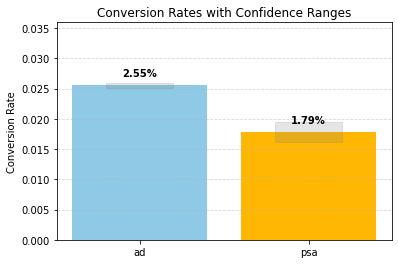

In [30]:
import statsmodels.api as sm

def plot_conversion_with_bands(df):
    import seaborn as sns
    summary = df.groupby(group_col)[metric_col].agg(['count', 'sum'])
    conversions = summary['sum'].values
    sizes = summary['count'].values
    rates = conversions / sizes
    ci_low, ci_upp = sm.stats.proportion_confint(conversions, sizes)

    fig, ax = plt.subplots()
    bars = ax.bar(group_names, rates, color=['#8ecae6', '#ffb703'])

    # Draw shaded CI areas
    for i in range(len(group_names)):
        ax.fill_between(
            [i - 0.2, i + 0.2],
            [ci_low[i]]*2,
            [ci_upp[i]]*2,
            color='gray',
            alpha=0.2
        )
        ax.text(i, rates[i] + 0.0015, f"{rates[i]:.2%}", ha='center', fontweight='bold')

    ax.set_ylabel("Conversion Rate")
    ax.set_title("Conversion Rates with Confidence Ranges")
    plt.ylim(0, max(ci_upp) + 0.01)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

plot_conversion_with_bands(df)

In [31]:
def bootstrap_conversion_plot(df, group_col, metric_col, group_names, n_bootstrap=1000, ci=95, random_state=30):
    results = {}
    rng = np.random.default_rng(seed=random_state)  # seeded RNG for reproducibility

    for group in group_names:
        data = df[df[group_col] == group][metric_col].values
        boot_means = []

        for _ in range(n_bootstrap):
            sample = rng.choice(data, size=len(data), replace=True)
            boot_means.append(sample.mean())

        results[group] = {
            "means": boot_means,
            "lower": np.percentile(boot_means, (100 - ci) / 2),
            "upper": np.percentile(boot_means, 100 - (100 - ci) / 2)
        }

    # Optional: keep plotting order as defined by group_names
    for group in group_names:
        sns.kdeplot(results[group]["means"], fill=True, label=f"{group} group")
        plt.axvline(results[group]["lower"], color='gray', linestyle='--', alpha=0.5)
        plt.axvline(results[group]["upper"], color='gray', linestyle='--', alpha=0.5)

    plt.title(f"Bootstrap Distribution of Conversion Rates ({ci}% CI)")
    plt.xlabel("Conversion Rate")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 🧾 Print CI summary
    for group in group_names:
        print(f"{group} group {ci}% CI: {results[group]['lower']:.4f} – {results[group]['upper']:.4f}")

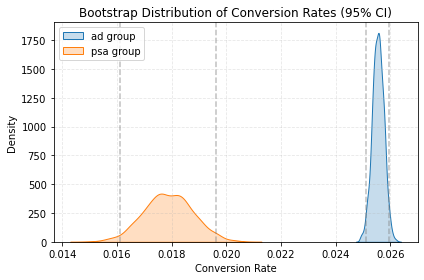

ad group 95% CI: 0.0251 – 0.0260
psa group 95% CI: 0.0161 – 0.0196


In [32]:
bootstrap_conversion_plot(df, group_col, metric_col, group_names)

## 📊 A/B Test Conclusion: Ads vs. PSA

### ✅ Result Summary
The **ad group** demonstrated a **statistically significant improvement** in conversion rate compared to the **PSA group**.

We ran a bootstrap simulation (1,000 samples) to account for natural variation. The resulting KDE plot shows:

- 📈 The **ad group's distribution** is centered around a **higher conversion rate**
- 🎯 The **95% confidence intervals** do **not overlap**
- 🔐 This tells us the difference is **unlikely to be due to chance**

### 💬 Plain English Interpretation
> "The ad campaign clearly outperformed the PSA. Even when simulating the experiment thousands of times, the results were consistently better for ads. We’re 95% confident this isn’t a fluke."

### 📌 Visual Support
- The **ad group's curve is taller and narrower**, meaning performance was both **better and more consistent**
- The **PSA group's curve is lower and wider**, indicating **worse and more variable** performance
- **No overlap in confidence bands** = strong statistical evidence of a real difference

---

### ✅ Confidence in Results Despite Group Imbalance

While the ad group had significantly more users than the PSA group, both groups were still **large enough** to support a reliable statistical test. The PSA group included over **23,000 users**, which is well above the sample size required to detect a meaningful difference based on our power calculations.

In other words, even though the group sizes weren't equal, we still have **high confidence** that the difference in conversion rates was **not due to chance**. The effect we observed is real and statistically significant, supported by both hypothesis testing and confidence intervals from bootstrapping.

---


### 🧠 Note on Stratification

Stratification was **not applied** in this analysis because the dataset does **not include any user-level metadata** (such as geography, device type, acquisition source, etc.) that would allow for meaningful segmentation.

In real-world experiments, stratifying by relevant features can help ensure balanced groups and increase statistical power by accounting for variance across subgroups. However, in this case, randomization appears sufficient given the simplicity of the dataset and the absence of known confounding variables.
